In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

%matplotlib inline

In [17]:
img1=plt.imread('warrior.jpg')
img=plt.imread('warrior.jpg')

img1.shape

(900, 505, 3)

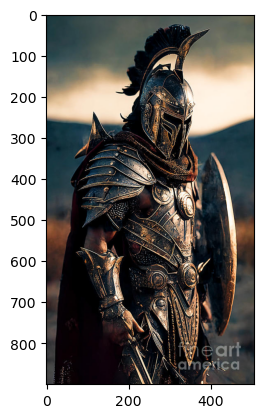

In [18]:
plt.imshow(img1)

### Use of slicing

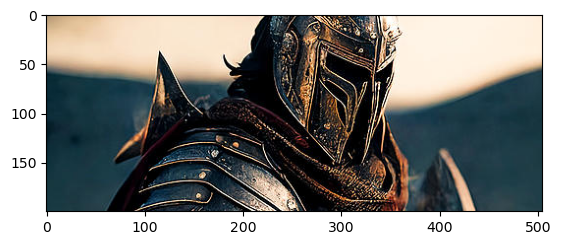

In [19]:
img1=img1[200:400,:600,:]
plt.imshow(img1)

### Changing the pixels value to generate image in rgb colors

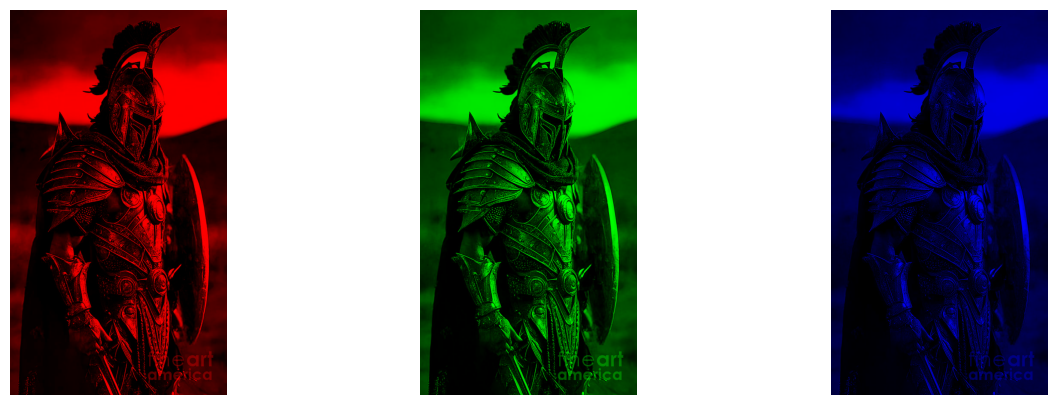

In [20]:
fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c,ax in zip(range(3),axs):
    tmp_img=np.zeros(img.shape,dtype="uint8")
    tmp_img[:,:,c]=img[:,:,c]
    ax.imshow(tmp_img)
    ax.set_axis_off()

C:\Users\bagwe\AppData\Local\Temp\ipykernel_17516\508751750.py:2: RuntimeWarning: divide by zero encountered in divide
  return -np.log(1/((1 + im)/257) - 1)
C:\Users\bagwe\AppData\Local\Temp\ipykernel_17516\508751750.py:5: RuntimeWarning: invalid value encountered in cast
  return (1 + 1/(np.exp(-im) + 1) * 257).astype("uint8")


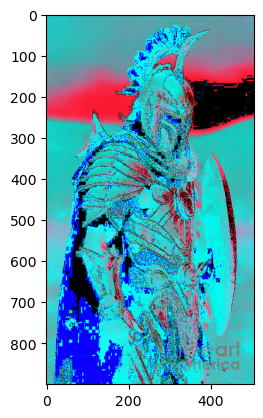

In [21]:
def do_normalise(im):
    return -np.log(1/((1 + im)/257) - 1)
 
def undo_normalise(im):
    return (1 + 1/(np.exp(-im) + 1) * 257).astype("uint8")

def rotation_matrix(theta):
    """
    3D rotation matrix around the X-axis by angle theta
    """
    return np.c_[
        [1,0,0],
        [0,np.cos(theta),-np.sin(theta)],
        [0,np.sin(theta),np.cos(theta)]
    ]

im_normed = do_normalise(img)
im_rotated = np.einsum("ijk,lk->ijl", im_normed, rotation_matrix(np.pi))
im2 = undo_normalise(im_rotated)

plt.imshow(im2)

MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\bagwe\AppData\Local\Temp\ipykernel_17516\508751750.py:2: RuntimeWarning: divide by zero encountered in divide
  return -np.log(1/((1 + im)/257) - 1)
C:\Users\bagwe\AppData\Local\Temp\ipykernel_17516\508751750.py:5: RuntimeWarning: invalid value encountered in cast
  return (1 + 1/(np.exp(-im) + 1) * 257).astype("uint8")


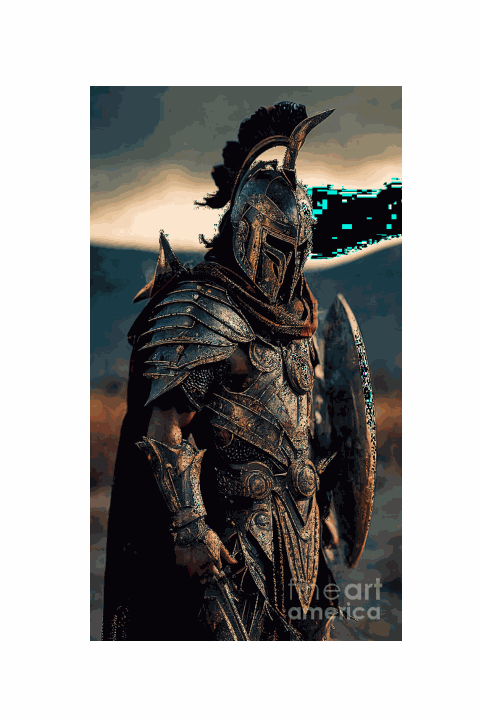

In [22]:
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image

fig,ax=plt.subplots(figsize=(6,9))

def animate(i):
    im_normed = do_normalise(img)
    im_rotated = np.einsum("ijk,lk->ijl", im_normed, rotation_matrix(i * np.pi/10))
    im2 = undo_normalise(im_rotated)
    
    ax.imshow(im2)
    ax.set_axis_off()
        

anim = FuncAnimation(fig, animate, frames=np.arange(0, 20), interval=50)
anim.save('animation.gif', dpi=80, writer='imagemagick')
plt.close()


display(Image(filename='animation.gif'))

### Changing weights of rgb and using mean of rgb values

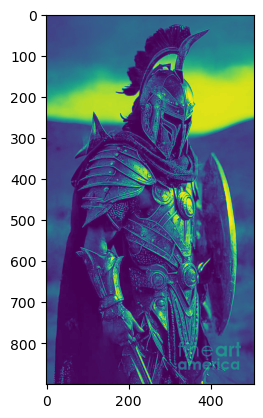

In [26]:
image=img.mean(axis=2)
plt.imshow(image)

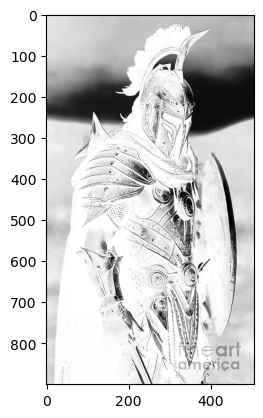

In [27]:
def to_grayscale(im, weights = np.c_[0.2989, 0.5870, 0.1140]):
   
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
    return np.sum(tile * im, axis=2)


img1 = to_grayscale(img)

plt.imshow(img1, cmap='Greys')

### Segmentation

#####  Segmentation involves partitioning an image into multiple segments or regions.We can do it by converting the image into grayscale and find the threshold.Pixels with a value above the threshold are treated as belonging to one region, and below another region.

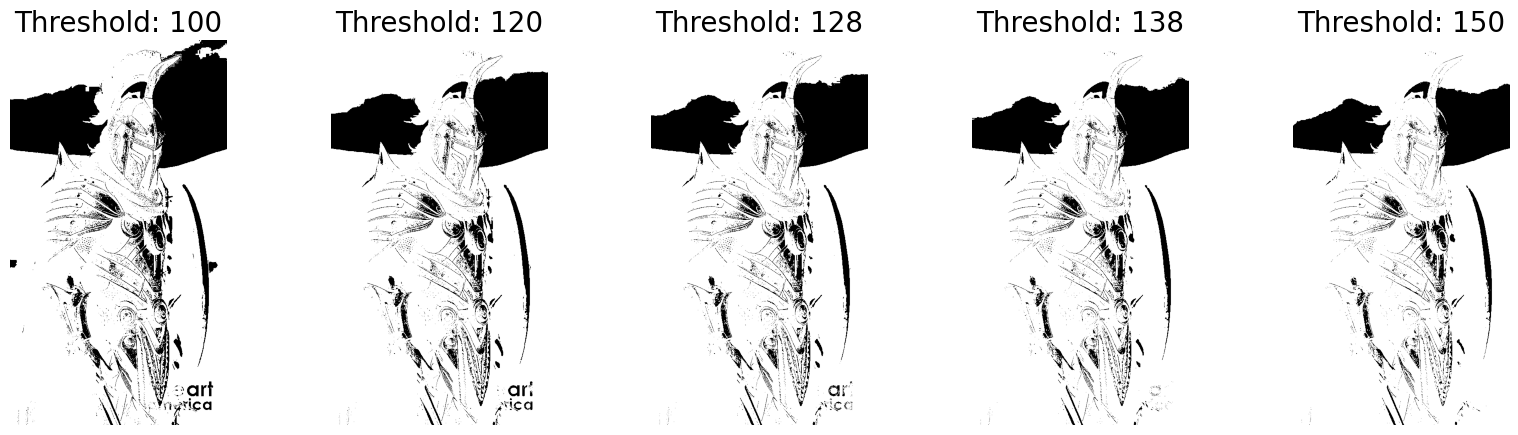

In [30]:
def apply_threshold(img,threshold=128):
    return ((img > threshold)*255).astype("uint8")

thresholds = [100,120,128,138,150]

fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
gray_im = to_grayscale(img)

                        
for t, ax in zip(thresholds, axs):
    ax.imshow(apply_threshold(gray_im, t), cmap='Greys');
    ax.set_title("Threshold: {}".format(t), fontsize=20);
    ax.set_axis_off();
    